<a href="https://colab.research.google.com/github/gustavovazquez/ML/blob/main/ML_Estad%C3%ADstica_Descriptiva_para_la_Detecci%C3%B3n_de_Correlaciones_y_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadística Descriptiva para la Detección de Correlaciones y Outliers
Este notebook presenta conceptos de estadística descriptiva con ejemplos prácticos en Python. Exploraremos:
- Cálculo y visualización de correlaciones.
- Uso de gráficos de dispersión y boxplots.
- Detección de outliers y problemas comunes en datasets reales.
---

## 1. Carga y exploración de datos
Primero, cargamos una muestra de datos y exploramos sus características básicas.

In [ ]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generar datos sintéticos
np.random.seed(42)
n = 200
data = pd.DataFrame({
    'X1': np.random.normal(50, 15, n),
    'X2': np.random.normal(30, 10, n) + np.random.normal(0, 5, n),
    'Y': np.random.normal(100, 20, n) + 0.5 * np.random.normal(50, 15, n)
})

# Introducir algunos valores atípicos
data.loc[5, 'X1'] = 150
data.loc[10, 'X2'] = -30
data.loc[15, 'Y'] = 300

# Mostrar las primeras filas
data.head()

,X1,X2,Y
0,57.450712,25.605735,147.176901
1,47.926035,32.610970,102.686358
2,59.715328,40.856731,143.113024
3,72.845448,40.772923,148.645693
4,46.487699,13.972979,130.009976


## 2. Visualización de correlaciones
Para identificar relaciones entre variables, podemos usar la matriz de correlación y gráficos de dispersión.

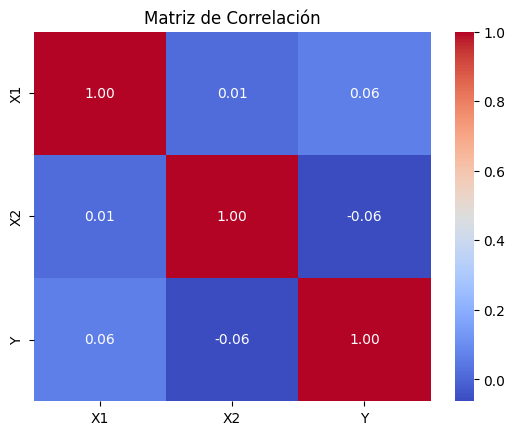

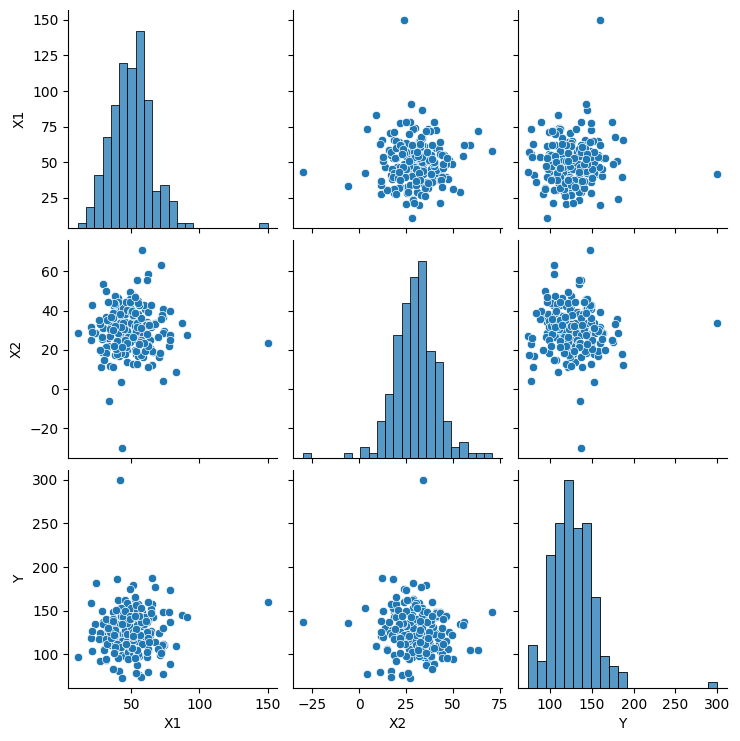

In [ ]:
# Matriz de correlación
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Graficar relaciones entre variables
sns.pairplot(data)
plt.show()

### Problemas comunes:
- **Colinealidad**: Dos variables pueden estar altamente correlacionadas, lo que puede afectar modelos predictivos.
- **Datos atípicos**: Valores extremos pueden influir en la correlación.

## 3. Boxplots y detección de outliers
Los diagramas de caja permiten visualizar la distribución de los datos y detectar valores atípicos.

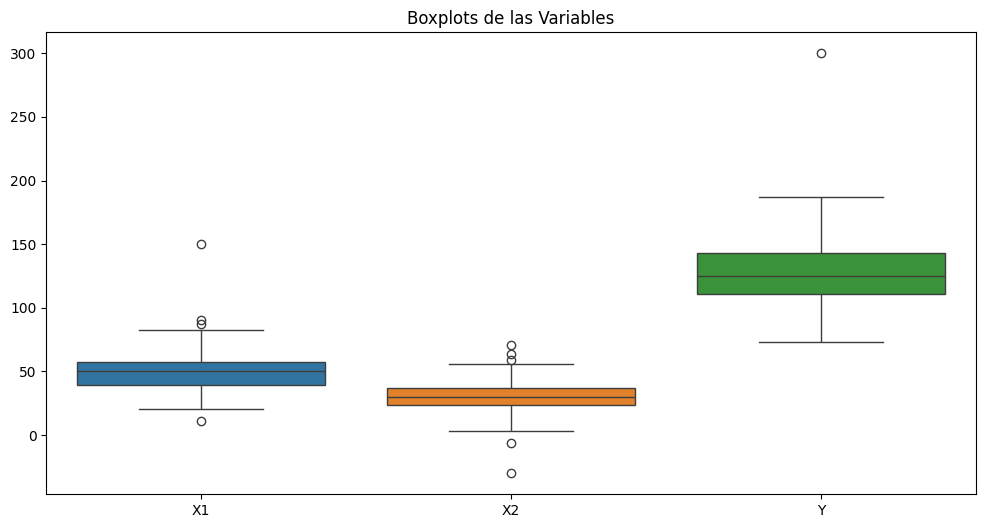

In [ ]:
# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title('Boxplots de las Variables')
plt.show()

### Detección de outliers con el método de IQR (Interquartile Range)

In [ ]:
# Función para detectar outliers
def detectar_outliers(df, columnas):
  # df es el dataframe
  # columnas es una lista de nombres de columnas
    outliers = pd.DataFrame()

    # si quisiera en todas las columnas numericas vvv

    for column in columnas:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtrar filas que contienen valores outliers en esta columna
        outlier_rows = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, outlier_rows])

    return outliers.drop_duplicates()  # Evitar duplicados si una fila es outlier en más de una variable

# Obtener y mostrar los outliers
# si quisiera detectar todos los outliers de todas las columnas numéricas le paso el argumento df.select_dtypes(include=[np.number]).columns:  # Solo variables numéricas
outliers_df = detectar_outliers(data, data[["X2"]])

# Mostrar el DataFrame con los outliers
print("Outliers detectados:")
print(outliers_df)

Outliers detectados:
           X1         X2           Y
9   58.138401  71.099509  148.211331
10  43.048735 -30.000000  136.685776
20  71.984732  63.450325  105.310848
34  62.338174  58.951226  104.497776
62  33.404975  -5.911301  135.951224


In [ ]:
# cuáles son las filas de los outliers?
outliers_df.index

Index([9, 10, 20, 34, 62], dtype='int64')

In [ ]:
# para borrar filas uso el método drop (primer argumento: índice de los IDs de filas a borrar, inplace=True: lo hace en el propio dataframe)
data.drop(outliers_df.index, inplace=True)
# NO CONFUNDIR drop para borrar columnas debo indicar el nombre en el parámetro columns. Ej: data.drop(columns=["Y"], inplace=True)


In [ ]:
data.shape


(195, 3)

### Manejo de outliers:
- **Eliminar** los valores atípicos si se detectan errores.
- **Transformar** los datos (log, raíz cuadrada) si los outliers afectan el análisis.
- **Imputar** con valores más representativos (mediana, promedio).

## Conclusión
En este notebook aprendimos a calcular correlaciones, visualizar relaciones entre variables, y detectar outliers en datasets reales.

# Imagen ilustrativa Boxplot

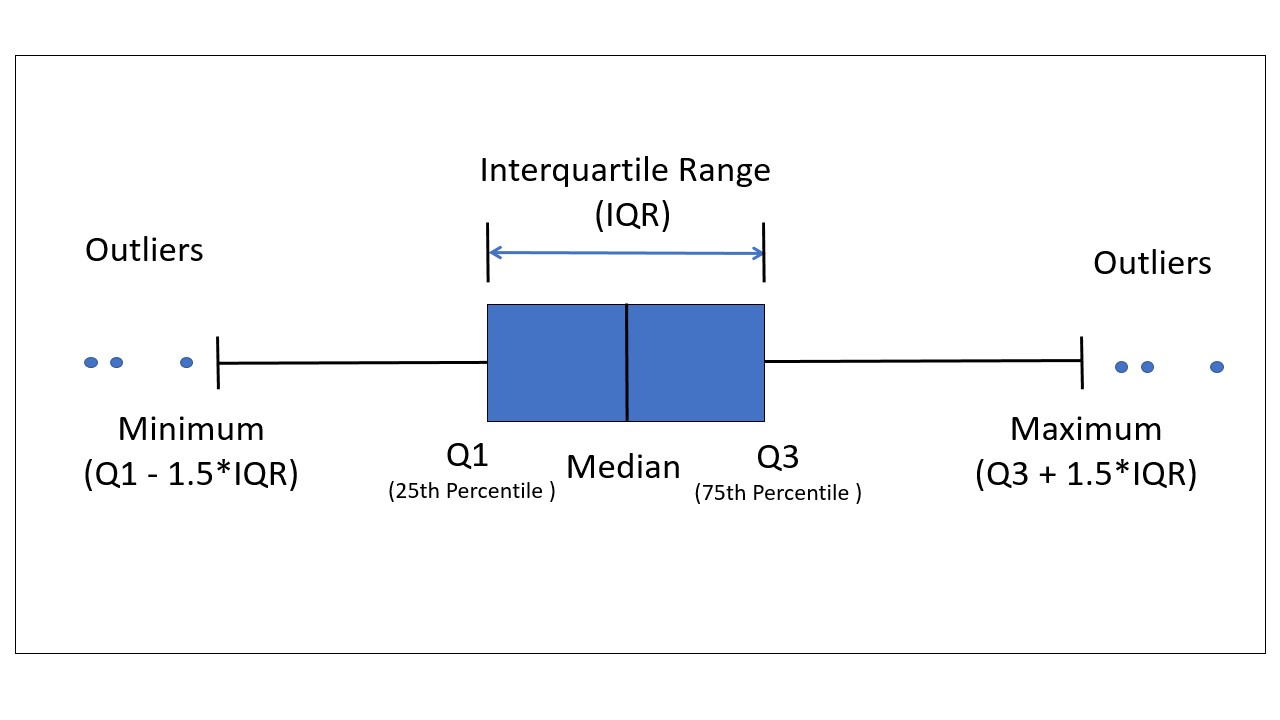